## 加载数据

In [90]:
# 加载关键依赖
import pandas as pd 
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#加载样本数据：Hair-cleanYesNo.csv
data = pd.read_csv('./Hair-cleanYesNo.csv')
data.head()



,Id,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair Loss
0,133992,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0,0
1,148393,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0,0
2,155074,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1,0
3,118261,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0,0
4,111915,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0,1


In [91]:
#提取样本数据
feature = data.iloc[:,1:12]
target = data['Hair Loss']
feature.head()

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss
0,1,0,No Data,No Data,Magnesium deficiency,Moderate,19,1,1,0,0
1,0,0,Eczema,Antibiotics,Magnesium deficiency,High,43,1,1,0,0
2,0,0,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,1,1,0,1
3,1,1,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,1,1,0,0
4,0,0,Psoriasis,Accutane,Iron deficiency,Moderate,30,0,1,1,0


## 特征值化

In [92]:
# 非可以分大小的特征使用one-hot转换
normal_cols = ['Genetics','Hormonal_Changes','Age','Poor_Hair_Care_Habits','Environmental_Factors','Smoking','Weight_Loss']
cols=["Medical_Conditions","Medications_Treatments","Nutritional_Deficiencies"]
ret = pd.get_dummies(feature[cols], dtype=int)
feature = pd.concat((feature,ret),axis=1).drop(columns=cols)
# 根据字典进行特征值化
# 压力替换数字表示
dic_stress = {
    'Low':1,
    'Moderate':2,
    'High':3
}
feature['Stress'] = feature['Stress'].map(dic_stress)
cols.append("Stress")
feature.head()

,Genetics,Hormonal_Changes,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Medical_Conditions_Alopecia Areata,Medical_Conditions_Androgenetic Alopecia,...,Nutritional_Deficiencies_Iron deficiency,Nutritional_Deficiencies_Magnesium deficiency,Nutritional_Deficiencies_No Data,Nutritional_Deficiencies_Omega-3 fatty acids,Nutritional_Deficiencies_Protein deficiency,Nutritional_Deficiencies_Selenium deficiency,Nutritional_Deficiencies_Vitamin A Deficiency,Nutritional_Deficiencies_Vitamin D Deficiency,Nutritional_Deficiencies_Vitamin E deficiency,Nutritional_Deficiencies_Zinc Deficiency
0,1,0,2,19,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,3,43,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2,26,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,2,46,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,30,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## 无量纲化

In [93]:
# 无量纲化处理
from sklearn.preprocessing import MinMaxScaler
tool = MinMaxScaler()
m_feature = tool.fit_transform(feature)

## 建模&训练

In [94]:
#数据集切分
x_train,x_test,y_train,y_test = train_test_split(m_feature,target,
                                                 test_size=0.2,
                                                 random_state=2020)

Text(0, 0.5, 'score')

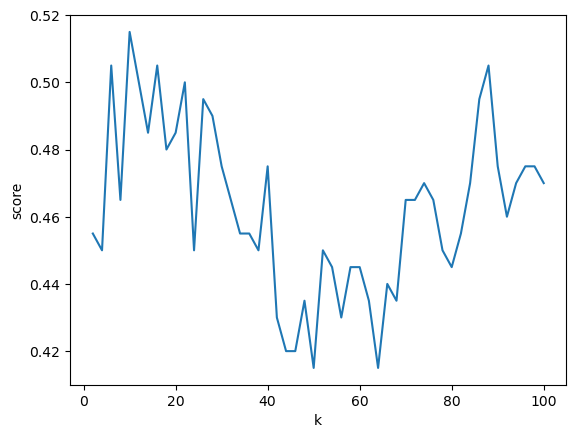

In [95]:
import numpy as np
import matplotlib.pyplot as plt
#通过学习曲线找寻模型最佳的超参数的值
ks = np.linspace(2,100,num=50).astype('int')
scores = [] #每一个k值对应模型的分值

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    scores.append(score)
    
scores = np.array(scores)
#绘制学习曲线
plt.plot(ks,scores)
plt.xlabel('k')
plt.ylabel('score')

In [96]:
#找寻最大分值对应的k值
max_index = np.argmax(scores)
best_k = ks[max_index]
best_k

10

In [97]:
#建模
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.515

In [98]:
#使用训练好的模型进行脱发检测任务
#伪造一条数据
dict = {
    'Genetics':[0,0],
    'Hormonal_Changes':[1,0],
    'Medical_Conditions':['Seborrheic Dermatitis','Dermatosis'],
    'Medications_Treatments':['Rogaine','Antibiotics'],
    'Nutritional_Deficiencies':['No Data','Biotin Deficiency'],
    'Stress':['Low','Moderate'],
    'Age':[30,50],
    'Poor_Hair_Care_Habits':[1,0],
    'Environmental_Factors':[1,0],
    'Smoking':[0,1],
    'Weight_Loss':[0,0]
}
sample = pd.DataFrame(data=dict)
sample


,Genetics,Hormonal_Changes,Medical_Conditions,Medications_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss
0,0,1,Seborrheic Dermatitis,Rogaine,No Data,Low,30,1,1,0,0
1,0,0,Dermatosis,Antibiotics,Biotin Deficiency,Moderate,50,0,0,1,0


In [99]:
# 特征值化
sample['Stress'] = sample['Stress'].map(dic_stress)
ret_sample = pd.get_dummies(sample[cols], dtype=int)
sample = pd.concat((sample,ret_sample),axis=1).drop(columns=cols)
sample.head()


,Genetics,Hormonal_Changes,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Medical_Conditions_Dermatosis,Medical_Conditions_Seborrheic Dermatitis,Medications_Treatments_Antibiotics,Medications_Treatments_Rogaine,Nutritional_Deficiencies_Biotin Deficiency,Nutritional_Deficiencies_No Data
0,0,1,30,1,1,0,0,0,1,0,1,0,1
1,0,0,50,0,0,1,0,1,0,1,0,1,0


In [85]:
# 无量纲化
m_sample = tool.fit_transform(sample)
m_sample

array([[0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.]])

In [100]:
res = model.predict(x_test)
print('模型识别的脱发结果:',res)

模型识别的脱发结果: [1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1]
